The task is a multi-class supervised learning problem to predict the damage classification of buildings 
as a result of the Gorkha earthquake in April 2015. The earthquake in question was 7.8 in magnitude and 
occured near the Gorkha district of Gandaki Pradesh, Nepal. Almost 9,000 lives were lost, millions of people
were instantly made homeless, and $10 billion in damages about half of Nepal's nominal GDP was incurred.
This analysis is applied to one of the largest post-disaster datasets ever collected, containing valuable 
information on earthquake impacts, household conditions, and socio-economic-demographic statistics. The 
target variable has 5 classes, labelled 'Grade 1':'Grade 5' which each represent the different scale of 
damage sustained to the building.

In [1]:
# importing library 

In [2]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns # Statistical visualisations
from math import pi # Radar chart support

In [3]:
# reading dataset

In [4]:
dataset0 = pd.read_csv('csv_building_damage_assessment.csv')

C:\Users\Shivam\AppData\Local\Temp\ipykernel_12480\3321414726.py:1: DtypeWarning: Columns (17,29,34,35,36,37,38,39,40,41,42,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset0 = pd.read_csv('csv_building_damage_assessment.csv')


In [5]:
dataset0.shape

(762106, 79)

In [6]:
# the model is not strong to compute a dataset with so many rows so the below line reduce the dataset to just 1000 rows

In [7]:
dataset =dataset0.head(1000)

In [8]:
# analyzing number of null values in the dataset

In [9]:
df_temp = dataset.isnull().sum().reset_index(name='count')
print(df_temp)

                                 index  count
0                          building_id      0
1                          district_id      0
2                            vdcmun_id      0
3                              ward_id      0
4              damage_overall_collapse     58
..                                 ...    ...
74  has_geotechnical_risk_liquefaction      0
75     has_geotechnical_risk_landslide      0
76     has_geotechnical_risk_rock_fall      0
77         has_geotechnical_risk_flood      0
78         has_geotechnical_risk_other      0

[79 rows x 2 columns]


 changing the data type 

In [10]:
dataset = dataset.astype({'district_id': 'int', 'vdcmun_id': 'int', 'ward_id': 'int'})

To start we look at the distribution of the target variable, we can see the occurence of each grade increases with the classification. Such that Grade 1 occurs the most frequently in the dataset while Grade 5 appears the least frequently. As this is a classifcation problem, we can see that it is unbalanced, with different grades accounting for very different proprotions of observations.

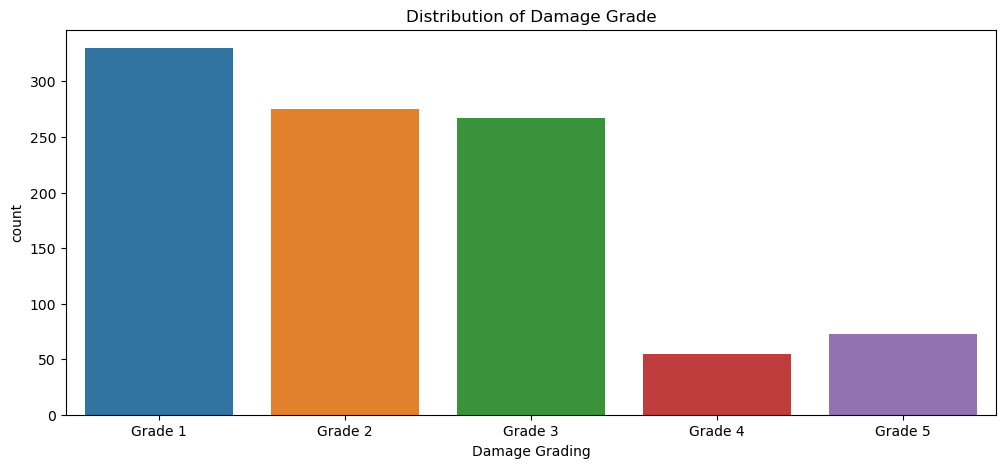

In [11]:
 plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=dataset, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   building_id                                           1000 non-null   int64  
 1   district_id                                           1000 non-null   int32  
 2   vdcmun_id                                             1000 non-null   int32  
 3   ward_id                                               1000 non-null   int32  
 4   damage_overall_collapse                               942 non-null    object 
 5   damage_overall_leaning                                942 non-null    object 
 6   damage_overall_adjacent_building_risk                 942 non-null    object 
 7   damage_foundation_severe                              614 non-null    object 
 8   damage_foundation_moderate                            32 no

In [13]:
import math

we need to do a analysis on the dataset for which we need to convert the catagorical dataset in to numerical.  in this data set 
we have option to either go for onehoteencoder or to replace directly with the number. as shown below the data can be correleted with integers. hence inorder to maitain the data size we can easly interpret the data with number. 

In [14]:
dataset['damage_overall_adjacent_building_risk']. nunique()
dataset.damage_overall_adjacent_building_risk.unique()

array(['None', 'Insignificant/light', 'Moderate-Heavy', nan], dtype=object)

here we have three distict entry 'None', 'Insignificant/light', 'Moderate-Heavy'. we can say that mathematical value of each is 0 , 1 , 3 respectivly and can proceed the analysis. same this is done for other 4 columns also.

In [15]:
dataset=dataset.replace({'damage_overall_adjacent_building_risk' : { 'Insignificant/light' : 1, 'Moderate-Heavy' : 3, 'None' : 0 }})


In [16]:
dataset['damage_overall_leaning']. nunique()
dataset.damage_overall_leaning.unique()

array(['Insignificant/light', 'Severe-Extreme', 'Moderate-Heavy', 'None',
       nan], dtype=object)

In [17]:
dataset=dataset.replace({'damage_overall_leaning' : { 'Insignificant/light' : 1, 'Moderate-Heavy' : 2, 'None' : 0,'Severe-Extreme' : 4 }})


In [18]:
dataset['has_repair_started']. nunique()
dataset.has_repair_started.unique()

array([ 0.,  1., nan])

In [19]:
dataset['has_damage_staircase']. nunique()
dataset.has_damage_staircase.unique()

array([ 0.,  1., nan])

In [20]:
dataset['damage_roof_severe']. nunique()
dataset.damage_roof_severe.unique()

array(['Severe-Extreme-(<1/3)', 'Severe-Extreme-(>2/3)', nan, 'None'],
      dtype=object)

In [21]:
dataset=dataset.replace({'damage_roof_severe' : { 'Severe-Extreme-(<1/3)' : 2, 'Severe-Extreme-(>2/3)' : 4, 'None' : 0 }})


In [22]:
print(dataset.damage_roof_severe)

0      2.0
1      4.0
2      NaN
3      NaN
4      NaN
      ... 
995    NaN
996    NaN
997    NaN
998    4.0
999    NaN
Name: damage_roof_severe, Length: 1000, dtype: float64


In [23]:
dataset.damage_grade.unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4'],
      dtype=object)

In [24]:
dataset=dataset.replace({'damage_grade' : { 'Grade 3' : 3, 'Grade 5' : 5, 'Grade 2' : 2,'Grade 1': 1,'Grade 4' : 4}})


In [25]:
# Split the data into features and target
X = dataset.loc[:1000, ['damage_overall_adjacent_building_risk','damage_overall_leaning','has_repair_started','has_damage_staircase','damage_roof_severe']]
y = dataset.loc[:1000, ['damage_grade']]

Below we have used sklearn libraray only to fill the missing values with the mean of all the values in that column. doing this final step. our data is ready for analsis.

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 0:5])
X.iloc[:, 0:5] = imputer.transform(X.iloc[:, 0:5])

so till now we have got proper columns to analyze the grade of didtruction of building. we can se variable x below.

In [27]:
print(X)

     damage_overall_adjacent_building_risk  damage_overall_leaning  \
0                                      0.0                     1.0   
1                                      1.0                     4.0   
2                                      3.0                     2.0   
3                                      3.0                     2.0   
4                                      0.0                     0.0   
..                                     ...                     ...   
995                                    0.0                     1.0   
996                                    0.0                     1.0   
997                                    0.0                     2.0   
998                                    0.0                     2.0   
999                                    0.0                     1.0   

     has_repair_started  has_damage_staircase  damage_roof_severe  
0                   0.0              0.000000            2.000000  
1                   1.0

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

now below we have made the model ready. we have used decision tree for analysing the data set.

In [30]:
# Define a function to calculate the mean squared error
def mean_squared_error(y):
    if len(y) == 0:
        return 0
    mean = sum(y) / len(y)
    return sum((yi - mean) ** 2 for yi in y) / len(y)

In [31]:
# Define a function to find the best split for a feature
def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    current_error = mean_squared_error(y)
    best_error = float('inf')
    best_split = None
    best_split_value = None

    for feature in range(num_features):
        feature_values = X[:, feature]
        unique_values = np.unique(feature_values)
        for value in unique_values:
            left_mask = feature_values <= value
            right_mask = feature_values > value
            left_y = y[left_mask]
            right_y = y[right_mask]

            if len(left_y) == 0 or len(right_y) == 0:
                continue

            error = (len(left_y) / num_samples) * mean_squared_error(left_y) + (len(right_y) / num_samples) * mean_squared_error(right_y)

            if error < best_error:
                best_error = error
                best_split = feature
                best_split_value = value

    return best_split, best_split_value

In [32]:
# Define a class to represent a decision tree node
class TreeNode:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth

    def fit(self, X, y):
        if self.max_depth is not None and self.depth >= self.max_depth:
            self.value = np.mean(y)
            return
        best_split, best_split_value = find_best_split(X, y)
        if best_split is not None:
            self.split_feature = best_split
            self.split_value = best_split_value
            self.left = TreeNode(self.depth + 1, self.max_depth)
            self.right = TreeNode(self.depth + 1, self.max_depth)
            left_mask = X[:, best_split] <= best_split_value
            right_mask = X[:, best_split] > best_split_value
            self.left.fit(X[left_mask], y[left_mask])
            self.right.fit(X[right_mask], y[right_mask])
        else:
            self.value = np.mean(y)

    def predict(self, X):
        if hasattr(self, 'value'):
            return np.full(X.shape[0], self.value)
        else:
            left_mask = X[:, self.split_feature] <= self.split_value
            right_mask = X[:, self.split_feature] > self.split_value
            result = np.empty(X.shape[0])
            result[left_mask] = self.left.predict(X[left_mask])
            result[right_mask] = self.right.predict(X[right_mask])
            return result

In [33]:
# Define a decision tree model
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = TreeNode(max_depth=self.max_depth)
        self.root.fit(X, y)

    def predict(self, X):
        return self.root.predict(X)

In [60]:
# Create a decision tree model and fit it to the data
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

InvalidIndexError: (slice(None, None, None), 0)

model - 2 dicision tree classifier

In [35]:
dataset1 = dataset0.head(1000)

In [36]:
X1 = dataset1.loc[:1000, ['damage_overall_adjacent_building_risk','damage_overall_leaning','has_repair_started','has_damage_staircase','damage_roof_severe']]
X1 = pd.get_dummies(X1, drop_first=True)
X1 = X1.apply(pd.to_numeric, errors='coerce')
X1.fillna(0, inplace=True)  #strategy for handling missing values
X1 = X1.values
y1 = dataset1.loc[:1000, 'damage_grade'].values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)

print(X1)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [38]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1 , y1, test_size = 0.2)

In [39]:
print(y1)

[2 4 1 1 0 1 4 1 2 2 1 0 0 1 0 0 2 1 2 2 1 0 0 2 1 1 2 0 0 0 0 0 0 0 0 3 3
 2 2 4 4 3 0 0 0 4 1 0 1 1 0 3 2 1 1 3 1 1 0 1 2 2 4 0 0 2 1 1 3 2 2 2 2 0
 2 0 4 1 1 2 2 0 0 2 3 0 0 0 0 3 2 1 0 2 0 0 1 3 3 0 0 0 0 0 0 0 4 3 1 4 0
 1 2 0 2 3 0 0 0 4 1 2 1 0 3 1 0 1 3 3 2 4 2 3 0 4 3 2 2 1 2 4 2 2 1 4 2 3
 2 4 2 4 4 3 1 2 0 2 2 2 4 4 0 1 4 0 1 2 0 3 0 3 0 3 2 2 3 4 2 1 4 4 2 2 4
 0 0 2 4 0 4 0 1 1 2 2 1 0 2 0 2 4 2 1 4 4 1 0 0 1 0 0 3 1 1 2 4 0 0 2 1 2
 2 0 2 4 1 0 0 4 1 2 2 3 4 2 2 1 1 2 3 0 4 1 0 0 0 1 0 0 2 0 2 1 0 1 0 3 0
 1 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 0 2 0 0 0 1 0 0 0 4 2 0 2 3 0
 0 2 0 2 0 0 0 0 0 3 2 1 0 1 0 0 0 2 4 0 0 1 3 2 0 0 1 3 4 0 0 2 3 1 1 0 0
 0 1 0 2 1 0 4 1 1 0 1 1 0 0 0 0 1 0 2 0 2 0 2 2 0 0 0 0 0 1 0 0 0 2 4 1 0
 0 2 2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 1 4 0 0 0 0 2 2 2 1 1 2 3 2 1 2 3 2 3 4
 3 1 0 2 4 2 0 2 2 2 0 4 3 4 3 2 2 1 2 2 3 1 1 3 2 2 4 1 3 3 1 2 0 0 2 1 2
 2 2 1 1 1 2 4 0 0 0 0 0 0 0 0 2 1 0 2 2 0 2 1 0 0 0 2 2 2 0 0 0 1 2 2 0 2
 0 0 0 1 1 0 1 0 0 2 4 1 

In [40]:
import numpy as np

class TreeNode:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth

    def fit(self, X, y):
        if self.max_depth is not None and self.depth >= self.max_depth:
            self.label = np.argmax(np.bincount(y))  # Assign the most frequent class as the label
            return

        best_split, best_split_value = find_best_split_categorical(X, y)
        if best_split is not None:
            self.split_feature = best_split
            self.split_value = best_split_value
            self.left = TreeNode(self.depth + 1, self.max_depth)
            self.right = TreeNode(self.depth + 1, self.max_depth)

            if np.issubdtype(X[:, best_split].dtype, np.number):
                left_mask = X[:, best_split] <= best_split_value
                right_mask = X[:, best_split] > best_split_value
            else:
                left_mask = X[:, best_split] == best_split_value
                right_mask = X[:, best_split] != best_split_value

            self.left.fit(X[left_mask], y[left_mask])
            self.right.fit(X[right_mask], y[right_mask])
        else:
            self.label = np.argmax(np.bincount(y))

    def predict(self, X):
        if hasattr(self, 'label'):
            return np.full(X.shape[0], self.label)
        else:
            if np.issubdtype(X[:, self.split_feature].dtype, np.number):
                left_mask = X[:, self.split_feature] <= self.split_value
                right_mask = X[:, self.split_feature] > self.split_value
            else:
                left_mask = X[:, self.split_feature] == self.split_value
                right_mask = X[:, self.split_feature] != self.split_value

            result = np.empty(X.shape[0], dtype=int)
            result[left_mask] = self.left.predict(X[left_mask])
            result[right_mask] = self.right.predict(X[right_mask])
            return result


def find_best_split_categorical(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    current_gini = gini_index(y)
    best_gini = float('inf')
    best_split = None
    best_split_value = None

    for feature in range(num_features):
        feature_values = X[:, feature]
        unique_values = np.unique(feature_values)
        for value in unique_values:
            left_mask = feature_values == value
            right_mask = feature_values != value
            left_y = y[left_mask]
            right_y = y[right_mask]

            if len(left_y) == 0 or len(right_y) == 0:
                continue

            gini = (len(left_y) / num_samples) * gini_index(left_y) + (len(right_y) / num_samples) * gini_index(right_y)

            if gini < best_gini:
                best_gini = gini
                best_split = feature
                best_split_value = value

    return best_split, best_split_value


def gini_index(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    class_probabilities = class_counts / len(y)
    gini = 1 - np.sum(class_probabilities**2)
    return gini


In [41]:
# Create an instance of the TreeNode class
tree = TreeNode(max_depth=3)

# Fit the decision tree to your data
tree.fit(X1_train, y1_train)


In [45]:
y1_pred = tree.predict(X1_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.685


model--3 multiple linear regression

In [67]:
print(y)

     damage_grade
0               3
1               5
2               2
3               2
4               1
..            ...
995             2
996             2
997             3
998             3
999             2

[1000 rows x 1 columns]


In [65]:
if type(y) is np.ndarray:
    print("y is a NumPy array")

# Check if X is a Pandas DataFrame
if type(y) is pd.DataFrame:
    print("y is a Pandas DataFrame")

y is a Pandas DataFrame


In [51]:
print(X)

     damage_overall_adjacent_building_risk  damage_overall_leaning  \
0                                      0.0                     1.0   
1                                      1.0                     4.0   
2                                      3.0                     2.0   
3                                      3.0                     2.0   
4                                      0.0                     0.0   
..                                     ...                     ...   
995                                    0.0                     1.0   
996                                    0.0                     1.0   
997                                    0.0                     2.0   
998                                    0.0                     2.0   
999                                    0.0                     1.0   

     has_repair_started  has_damage_staircase  damage_roof_severe  
0                   0.0              0.000000            2.000000  
1                   1.0

In [57]:
missing_values_count = X['has_damage_staircase'].isna().sum()
print(missing_values_count)

0


In [63]:
new_column = np.ones((1000, 1))

In [70]:
x = np.hstack((new_column , X.astype(float).values))
Y = y.astype(float).values

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x , Y, test_size = 0.2)

In [72]:
print(x_train)

[[1.         0.         0.         0.         1.         0.        ]
 [1.         0.         1.         0.         1.         0.14444444]
 [1.         0.         0.         0.53066333 1.         0.        ]
 ...
 [1.         0.04989384 0.54140127 1.         0.42810099 0.14444444]
 [1.         0.         0.         0.53066333 1.         0.        ]
 [1.         0.         2.         1.         0.         0.14444444]]


In [82]:
print(Y_train)

[[3.]
 [3.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [5.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [5.]
 [2.]
 [3.]
 [5.]
 [1.]
 [3.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [1.]
 [1.]
 [3.]
 [2.]
 [1.]
 [3.]
 [2.]
 [1.]
 [1.]
 [3.]
 [5.]
 [2.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [3.]
 [2.]
 [1.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [3.]
 [2.]
 [5.]
 [1.]
 [2.]
 [1.]
 [3.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [2.]
 [1.]
 [3.]
 [1.]
 [1.]
 [4.]
 [3.]
 [3.]
 [1.]
 [2.]
 [5.]
 [2.]
 [5.]
 [3.]
 [4.]
 [4.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [1.]
 [2.]
 [5.]
 [1.]
 [3.]
 [1.]
 [2.]
 [3.]
 [3.]
 [1.]
 [4.]
 [5.]
 [1.]
 [2.]
 [3.]
 [3.]
 [2.]
 [1.]
 [1.]
 [5.]
 [3.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.

In [78]:
x_train.shape

(800, 6)

In [86]:
x_train_transpose = np.transpose(x_train)
K = np.dot(x_train_transpose , x_train)
inverse_K = np.linalg.inv(K)
theta = np.dot(inverse_K,np.dot(x_train_transpose , Y_train))
print(theta)

[[ 2.12708528]
 [-0.14150891]
 [ 0.76464148]
 [-0.56502697]
 [-0.09497216]
 [ 0.3964485 ]]


In [87]:
# Make predictions using the trained model

y_pred = x_test.dot(theta)

print("Predictions:", y_pred)


Predictions: [[3.71363303]
 [2.3433069 ]
 [2.38396458]
 [2.12708528]
 [3.71363303]
 [2.18435007]
 [3.14860606]
 [1.73227403]
 [1.61932309]
 [3.71363303]
 [1.46708615]
 [1.46708615]
 [1.56205831]
 [2.94899155]
 [2.89172677]
 [3.71363303]
 [2.32669979]
 [2.94899155]
 [2.55060984]
 [1.82724619]
 [2.08937791]
 [3.14860606]
 [3.61866088]
 [2.89172677]
 [2.12708528]
 [3.56139609]
 [1.78953882]
 [1.73227403]
 [1.98558287]
 [1.73227403]
 [1.73227403]
 [2.38396458]
 [1.73227403]
 [3.71363303]
 [2.18435007]
 [1.46708615]
 [2.38396458]
 [1.73227403]
 [2.55060984]
 [2.94899155]
 [2.55060984]
 [1.61932309]
 [2.94899155]
 [2.38396458]
 [1.82724619]
 [2.38396458]
 [1.56205831]
 [2.38396458]
 [2.55060984]
 [2.24245567]
 [2.38396458]
 [2.79675461]
 [3.14860606]
 [1.46708615]
 [1.52435094]
 [2.38396458]
 [1.73227403]
 [1.56205831]
 [2.94899155]
 [3.61866088]
 [2.12708528]
 [2.94899155]
 [1.52435094]
 [2.55060984]
 [2.55060984]
 [2.32669979]
 [1.46708615]
 [1.98558287]
 [3.71363303]
 [1.46708615]
 [1.562

In [90]:
mse = np.mean((Y_test - y_pred)**2)
print(mse)

1.0419672349664055


In [91]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(Y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.3550586562475826
